In [33]:
#Import libraries
import warnings
#Ignore all warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
#nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nimo0033\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
#Import data
data=pd.DataFrame()
data = pd.read_csv('British_Airways_Reviews.csv')
data.head()

,Header,Review,Rating
0,very friendly cabin crew,"A rather empty and quiet flight to Tel Aviv,...",9
1,a good drinks and food service,Easy check in and staff member was polite an...,9
2,you should let me use the lounge,Being a silver flyer and booking a flight th...,1
3,I find BA incredibly tacky,I find BA incredibly tacky and constantly lo...,3
4,This flight was so disappointing,Flew ATL to LHR 8th Jan 2023. Was unlucky en...,4


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Header  3300 non-null   object
 1   Review  3300 non-null   object
 2   Rating  3300 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 77.5+ KB


In [36]:
data['Sentiment'] = data['Rating'].apply(lambda r : +1 if r >= 5 else 0)
data.head()

,Header,Review,Rating,Sentiment
0,very friendly cabin crew,"A rather empty and quiet flight to Tel Aviv,...",9,1
1,a good drinks and food service,Easy check in and staff member was polite an...,9,1
2,you should let me use the lounge,Being a silver flyer and booking a flight th...,1,0
3,I find BA incredibly tacky,I find BA incredibly tacky and constantly lo...,3,0
4,This flight was so disappointing,Flew ATL to LHR 8th Jan 2023. Was unlucky en...,4,0


In [37]:
data['Sentiment'].value_counts()

0    1947
1    1353
Name: Sentiment, dtype: int64

In [38]:
import re
import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download("stopwords")
from nltk.corpus import stopwords
def clean_review(review,my_stopwords,my_lemmatizer):
    words=review.split()
    cleanreview=[w for w in words if not w.lower() in my_stopwords]
    cleanreview = [w.lower() for w in cleanreview]
    cleanreview = [re.sub("[0-9" "]+","",w) for w in cleanreview]
    cleanreview = [my_lemmatizer.lemmatize(w) for w in cleanreview]
    cleanreview=" ".join(w for w in cleanreview)
    return cleanreview

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nimo0033\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Nimo0033\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nimo0033\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
reviews = data['Header']
reviews

0                 friendly cabin crew
1             good drink food service
2                      let use lounge
3            find ba incredibly tacky
4                flight disappointing
                    ...              
3295               seat uncomfortable
3296    let chaotic check-in boarding
3297          crew attentive charming
3298        become absolute nightmare
3299      wonderful ba representative
Name: Header, Length: 3300, dtype: object

In [42]:
my_stopwords = set(stopwords.words('english'))
my_lemmatizer = WordNetLemmatizer()
# Apply the function to the reviews
reviews = [clean_review(review,my_stopwords,my_lemmatizer) for review in reviews]

In [191]:
from PIL import ImageFilter

def draw_contour(img, mask, contour_width, contour_color):
    """Draw mask contour on a pillow image."""
    contour = Image.fromarray(mask)
    contour = contour.resize(img.size)
    contour = contour.filter(ImageFilter.FIND_EDGES)
    contour = np.array(contour)

    # make sure borders are not drawn
    contour[[0, -1], :] = 0
    contour[:, [0, -1]] = 0

    # use a gaussian to define the contour width
    radius = contour_width / 10
    contour = Image.fromarray(contour)
    contour = contour.filter(ImageFilter.GaussianBlur(radius=radius))
    contour = np.array(contour) > 0
    contour = np.dstack((contour, contour, contour))

    # color the contour
    ret = np.array(img) * np.invert(contour)
    if contour_color != 'black':
        color = Image.new(img.mode, img.size, contour_color)
        ret += np.array(color) * contour

    return Image.fromarray(ret)

def make_wordclouds(wordCloud_p,wordCloud_n):

    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_dpi(300)
    contour = draw_contour(wordCloud_p.to_image(), wordCloud_p.mask, 1, 'blue')
    axes[0].imshow(contour,interpolation='bilinear')
    #axes[0].imshow(wordCloud_p,interpolation='bilinear')
    axes[0].axis('off')
    axes[0].title.set_text('Reviews with Ranking>=5')
    fig.tight_layout() # used to adjust padding between subplots 
    #axes[1].imshow(wordCloud_n,interpolation='bilinear')
    contour = draw_contour(wordCloud_n.to_image(), wordCloud_n.mask, 1, 'blue')
    axes[1].imshow(contour,interpolation='bilinear')
    axes[1].axis('off')
    axes[1].title.set_text('Reviews with Ranking<5')
    plt.show()

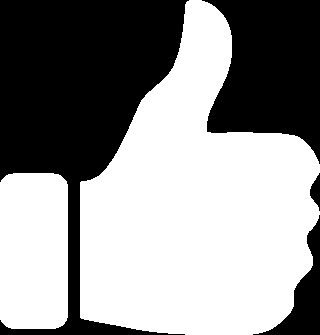

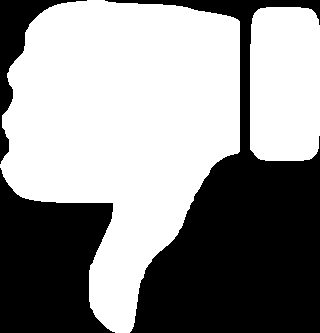

In [193]:
from PIL import Image
import cv2


im_like = Image.open("like.png")
im_like = im_like.convert("L")
#display(im_like)

im_dislike = Image.open("dislike.png")
im_dislike = im.convert("L")
#display(im_dislike)

In [194]:
from PIL import Image
mask_p = np.absolute( 255 - np.array(im_like) )
mask_n = np.absolute( 255 -np.array(im_dislike) )



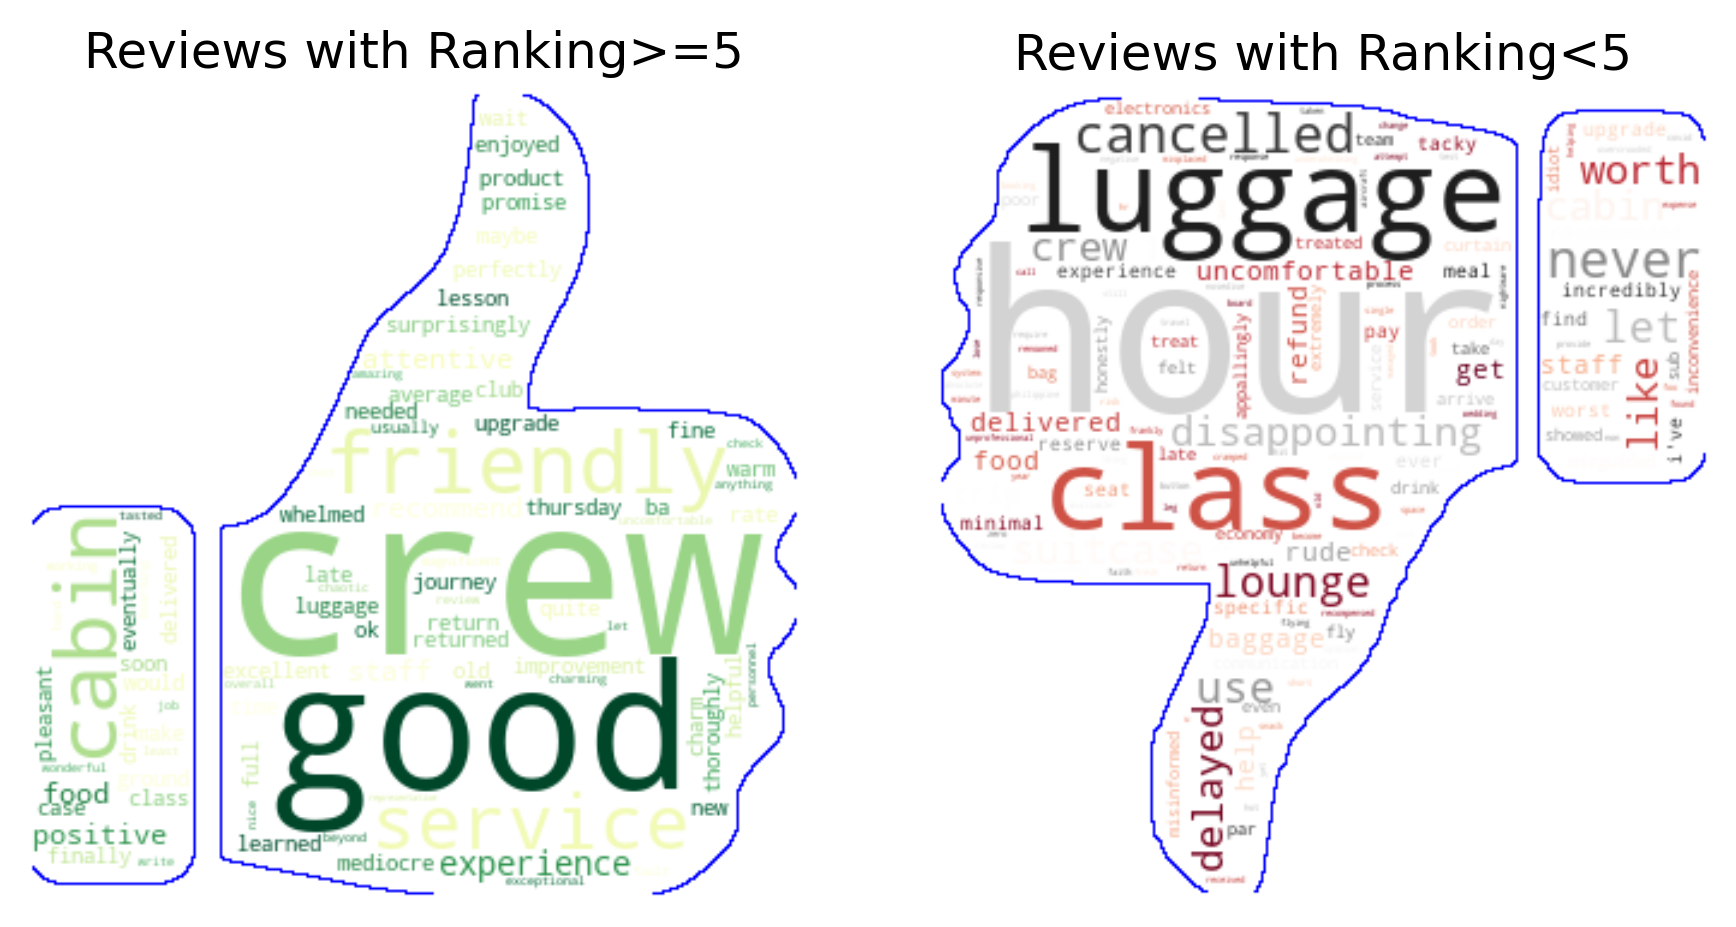

In [195]:

cleaned_data=pd.DataFrame(data)
cleaned_data['Header']=cleaned_data['Header'].apply(clean_review,args=(my_stopwords,my_lemmatizer))
positive=' '.join(word for word in cleaned_data['Header'][cleaned_data['Sentiment']==1].astype(str))
negative=' '.join(word for word in cleaned_data['Header'][cleaned_data['Sentiment']==0].astype(str))
wordCloud_p=WordCloud(mask=mask_p,background_color='white',random_state=21,
                      max_font_size=110,stopwords=my_stopwords,colormap='YlGn',collocations=False).generate(positive)
wordCloud_n=WordCloud(mask=mask_n,background_color='white',random_state=21,
                      max_font_size=110,stopwords=my_stopwords,colormap='RdGy',collocations=False).generate(negative)
make_wordclouds(wordCloud_p,wordCloud_n)

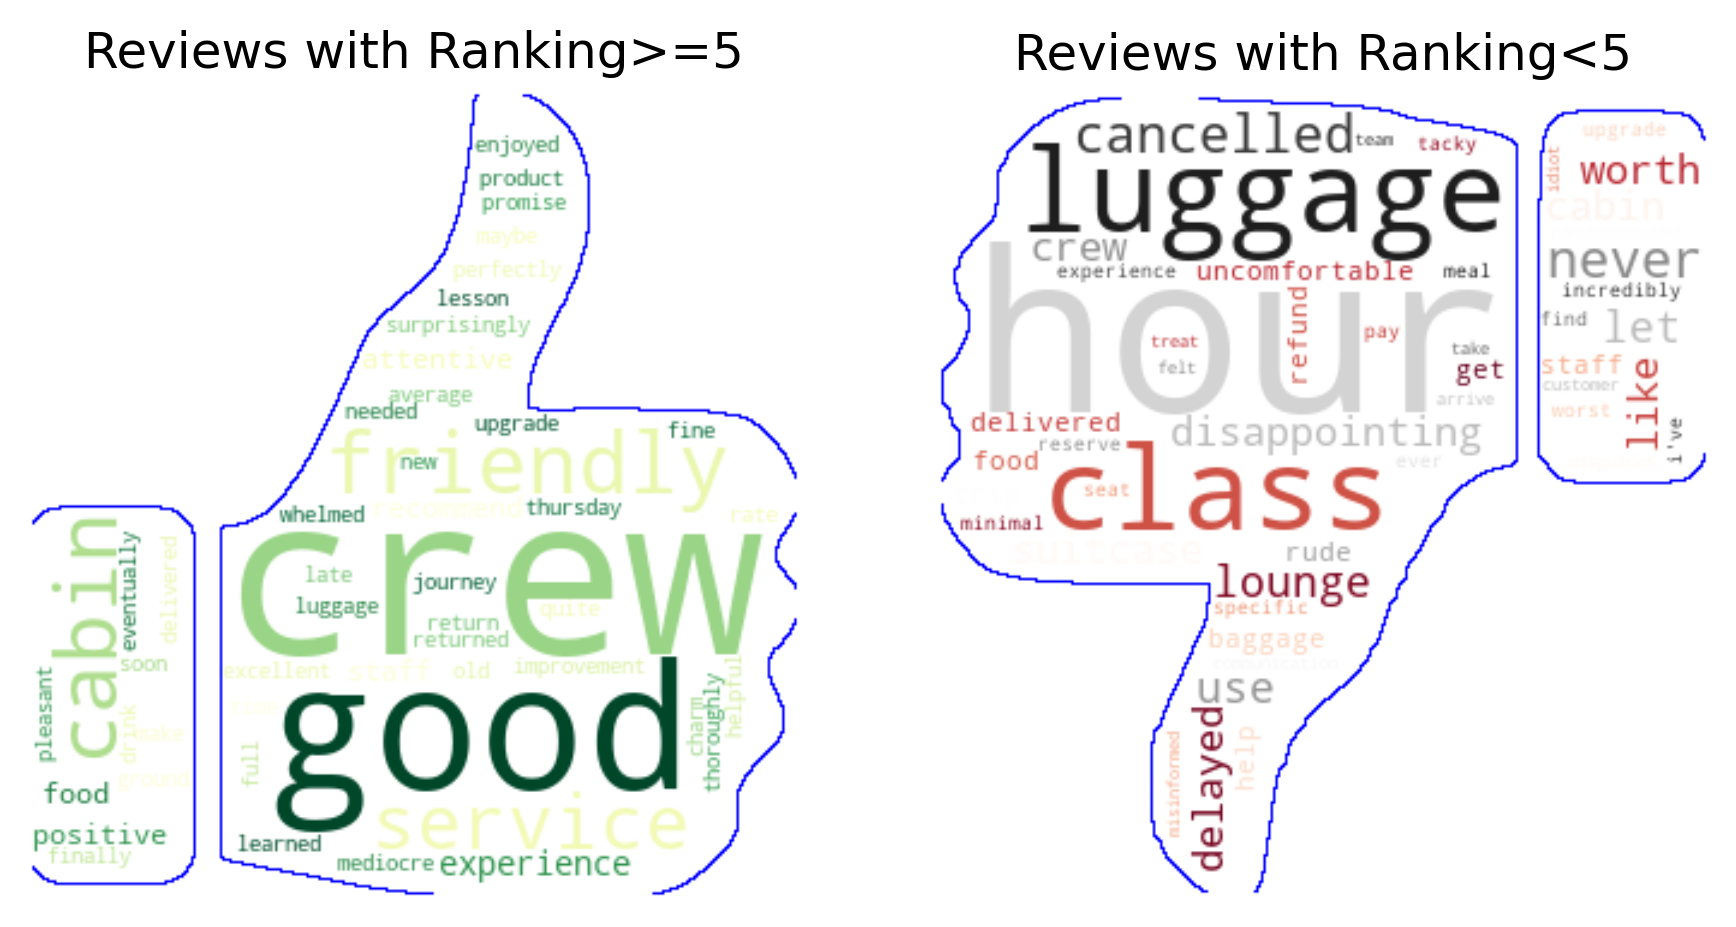

In [197]:
my_new_stopwords = set(stopwords.words('english'))
my_new_stopwords.update(['british','airway','airline','flight','business','business','london','airport','passenger','ba',
                        'heathrow']) 


cleaned_data_new=pd.DataFrame(data)
cleaned_data_new['Header']=cleaned_data_new['Header'].apply(clean_review,args=(my_new_stopwords,my_lemmatizer))
positive=' '.join(word for word in cleaned_data_new['Header'][cleaned_data_new['Sentiment']==1].astype(str))
negative=' '.join(word for word in cleaned_data_new['Header'][cleaned_data_new['Sentiment']==0].astype(str))
wordCloud_p=WordCloud(mask=mask_p,background_color='white',width=800,height=500,random_state=21,max_font_size=110,max_words=50,
                      stopwords=my_new_stopwords,colormap='YlGn',collocations=False ).generate(positive)
wordCloud_n=WordCloud(mask=mask_n,background_color='white',width=800,height=500,random_state=21,max_font_size=110,max_words=50,
                      stopwords=my_new_stopwords,colormap='RdGy',collocations=False).generate(negative)
make_wordclouds(wordCloud_p,wordCloud_n)


In [199]:
from sklearn.feature_extraction.text import TfidfVectorizer
#lets clean the original data using the english stopwords
ba_reviews=pd.DataFrame(data)
ba_reviews['Header']=ba_reviews['Header'].apply(clean_review,args=(my_new_stopwords,my_lemmatizer))
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ba_reviews['Header'], ba_reviews['Sentiment'],
                                                    test_size=0.33, random_state=42)

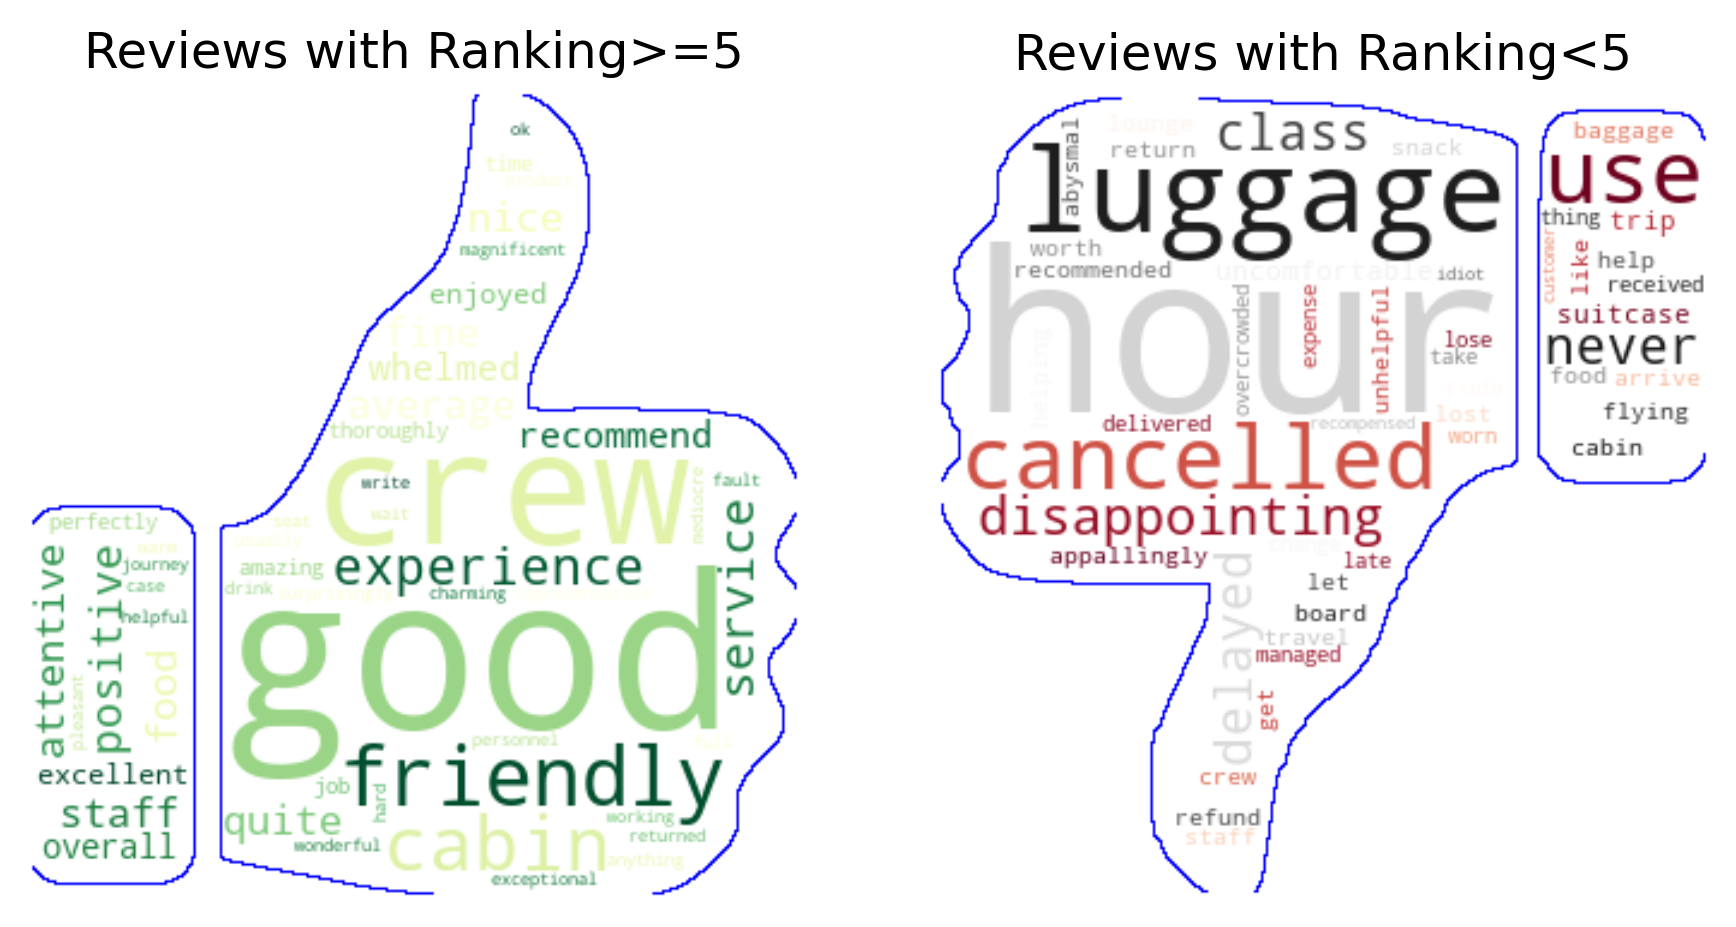

In [200]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = X_train

vectorizer = TfidfVectorizer(stop_words=my_new_stopwords,ngram_range=(1,1))
#vectorizer = CountVectorizer(stop_words='english')
vecs = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()

vecs1=vecs[y_train==1]
dense = vecs1.todense()
lst1 = dense.tolist()
positive = pd.DataFrame(lst1, columns=feature_names)

vecs2=vecs[y_train==0]
dense = vecs2.todense()
lst1 = dense.tolist()
negative = pd.DataFrame(lst1, columns=feature_names)


wordCloud_p=WordCloud(mask=mask_p,background_color='white',width=800,height=500,random_state=21,max_font_size=110,max_words=50,
                      stopwords=my_new_stopwords,colormap='YlGn').generate_from_frequencies(positive.T.sum(axis=1))
wordCloud_n=WordCloud(mask=mask_n,background_color='white',width=800,height=500,random_state=21,max_font_size=110,max_words=50,
                      stopwords=my_new_stopwords,colormap='RdGy').generate_from_frequencies(negative.T.sum(axis=1))
make_wordclouds(wordCloud_p,wordCloud_n)
